## Predicting Sale Prices of Bulldozers using Machine Learning

### 1. Problem definition
How well can we predict the future prices of bulldozers given their characteristics and previous prices.
### 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition.
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/description

The data for this competition is split into three parts:

>Train.csv is the training set, which contains data through the end of 2011.

>Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

>Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
**Note the goal is to find a machine learning model which minimized RMSLE.**
### 4. Features
Kaggle provides a dictionary detailing all the features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv('TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

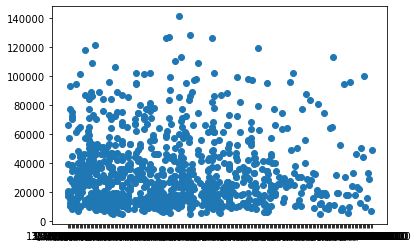

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

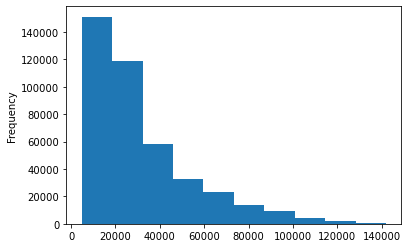

In [6]:
df.SalePrice.plot.hist()

### Parsing Dates

In [7]:
df = pd.read_csv('TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

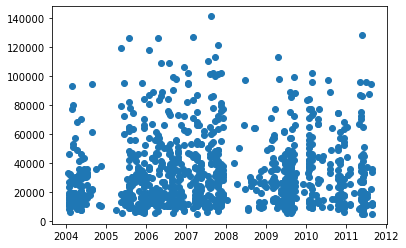

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [9]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Sort DataFrame by date
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [11]:
# Make a copy of original dataframe
df_tmp = df.copy()

In [12]:
# Add datetime parameters for `saledate` column
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayofWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDayofYear'] = df_tmp['saledate'].dt.dayofyear

df_tmp.drop('saledate', inplace=True, axis=1)

In [15]:
#df_tmp.head().T

In [16]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

### 5. Modelling

#### Turning data into numbers

In [18]:
# Turning string values into categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [19]:
#df_tmp.isnull().sum()/len(df_tmp)

### Filling missing numeric values 

In [21]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [22]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+'is_missing'] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [23]:
# Check to see what a Binary column did
df_tmp.isnull().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

### Filling missing categorical values

In [25]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # turn categories into numbers and add 1 
        df_tmp[label] = pd.Categorical(content).codes + 1

In [26]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [27]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### 5. Modelling 

Attempting to build a machine learning model after filling and changing variable types.

In [28]:
from sklearn.ensemble import RandomForestRegressor
len(df_tmp)

412698

In [29]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

Wall time: 9min 32s


RandomForestRegressor(n_jobs=-1)

In [30]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9875765521398647

**Question:** Why is not the metric above reliable?

## Splitting the data into train and validation datasets

In [31]:
df_val = df_tmp[df_tmp.saleYear==2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [32]:
# Split into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

X_train.shape, y_train.shape

((401125, 102), (401125,))

## Building an evaluation function

In [49]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate different metrics 
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, val_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, val_preds),
             'Training R^2':r2_score(y_train, train_preds),
             'Valid R^2': r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune hyperparameters)

In [ ]:
# This takes too long
#%%time

#model = RandomForestRegressor(n_jobs=-1, random_state=42)
#model.fit(X_train, y_train)

In [34]:
# Change max samples value to cut a dataset and speed the fitting speed
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000) 

In [35]:
%%time
model.fit(X_train, y_train)

Wall time: 25.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [50]:
show_scores(model)

{'Training MAE': 5562.719561283889,
 'Valid MAE': 7171.499803853797,
 'Training RMSLE': 0.25787072541982814,
 'Valid RMSLE': 0.2931779362719504,
 'Training R^2': 0.8606040720648533,
 'Valid R^2': 0.832300881431919}

### Hyperparameter tuning with RandomizedSearchCV

In [52]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid= {'n_estimators': np.arange(10, 100, 10),
         'max_depth': [None, 3, 5, 10],
         'min_samples_split': np.arange(2, 20, 2),
         'min_samples_leaf': np.arange(1, 20, 2),
         'max_features': [0.5, 1, 'sqrt', 'auto'],
         'max_samples': [10000]}
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)
# Fit the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 2min 27s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [55]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [53]:
show_scores(rs_model)

{'Training MAE': 6634.587046257012,
 'Valid MAE': 8078.428709549564,
 'Training RMSLE': 0.29659720509200704,
 'Valid RMSLE': 0.32149608101738525,
 'Training R^2': 0.8070507785128775,
 'Valid R^2': 0.782614919009349}

## Train the model with best hyperparameters

In [56]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_split=14,
                                    min_samples_leaf=1,
                                    max_samples=None,
                                    max_features=0.5,
                                    n_jobs=-1)
ideal_model.fit(X_train, y_train)

Wall time: 1min 52s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [57]:
show_scores(ideal_model)

{'Training MAE': 2957.8102193730547,
 'Valid MAE': 5985.783805630867,
 'Training RMSLE': 0.14486869696108765,
 'Valid RMSLE': 0.24674058576230068,
 'Training R^2': 0.9588135851230672,
 'Valid R^2': 0.8807198751169492}

## Make predictions on test data

In [104]:
# Import the test data
df_test = pd.read_csv('Test.csv', parse_dates=['saledate'])

## Preprocessing the testing dataset

In [91]:
# Perform tranformations on df and return transformed df
def preprocess_data(df):
    # Add datetime parameters for `saledate` column
    df['saleYear'] = df['saledate'].dt.year
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayofWeek'] = df['saledate'].dt.dayofweek
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDayofYear'] = df['saledate'].dt.dayofyear

    df.drop('saledate', inplace=True, axis=1)
    # Fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
        # Fill categorical values into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    return df

In [92]:
df_test = preprocess_data(df_test)

In [93]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [102]:
# Make predictions on updates test data
#test_preds = ideal_model.predict(df_test)

In [95]:
# Check which column is missing
set(X_train.columns)-set(df_test.columns)

{'auctioneerIDis_missing'}

In [97]:
df_test['auctioneerIDis_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


### Finally the test data has the same dimension as the train data

In [100]:
test_preds = ideal_model.predict(df_test)

In [101]:
# Format the predictions to the Kaggle format
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,22233.026769
1,1227844,18796.658441
2,1227847,48143.931080
3,1227848,63833.155171
4,1227863,52028.208815
...,...,...
12452,6643171,47179.803926
12453,6643173,16176.351949
12454,6643184,20864.942692
12455,6643186,19717.255775


## Feature Importance

It seeks to figure out which different attributes of the data were most important when it comes to predict target variable.

In [108]:
# Fina feature importance of the best model
ideal_model.feature_importances_

array([3.16779483e-02, 1.79673288e-02, 4.49739831e-02, 1.52739386e-03,
       3.27209162e-03, 2.02181593e-01, 3.13063120e-03, 9.79101572e-04,
       4.78021468e-02, 4.57293976e-02, 6.36292253e-02, 4.22215189e-03,
       1.06434461e-02, 1.50240424e-01, 4.34047823e-02, 5.90595399e-03,
       3.43251545e-03, 3.12248441e-03, 3.27555543e-03, 7.61821300e-02,
       7.21625476e-04, 4.96973587e-05, 9.11370152e-04, 1.92152035e-04,
       1.14010230e-03, 2.18215289e-05, 9.91912208e-05, 4.14112558e-03,
       2.13778778e-03, 2.15862027e-03, 2.41610526e-03, 1.54589450e-03,
       2.70555369e-03, 5.25339766e-04, 2.19507712e-03, 1.06254665e-02,
       8.15510927e-04, 8.55041992e-03, 8.69946421e-04, 2.74424760e-03,
       1.70311517e-03, 7.82131998e-04, 1.64284493e-03, 5.29642282e-04,
       9.24503400e-04, 3.59068053e-04, 3.79360256e-04, 1.79859014e-03,
       1.00553108e-03, 2.88885866e-04, 3.22732300e-04, 7.36496452e-02,
       5.71534359e-03, 2.87652214e-03, 3.86935737e-03, 9.78441444e-03,
      

In [115]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importances': importances})).sort_values('feature_importances', ascending=False).reset_index(drop=True)
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

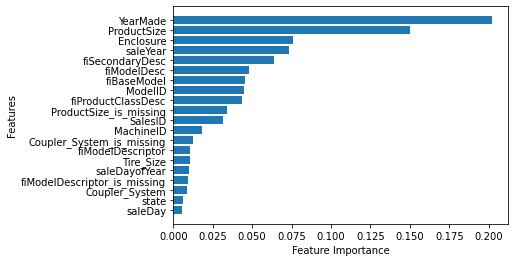

In [116]:
plot_features(X_train.columns, ideal_model.feature_importances_)